In [1]:
import sys
sys.path.append('../src')

import json
import os
from config import DATASET_DIR
from visual import plot_distribution
from utils import get_class_distribution

Training set class distribution:
Counter({'elliptical': 9082, 'spiral barred': 4106, 'spiral': 3504, 'spiral edge-on': 3073, 'artifact': 26})
Validation set class distribution:
Counter({'elliptical': 2613, 'spiral barred': 1201, 'spiral': 971, 'spiral edge-on': 868, 'artifact': 2})
Test set class distribution:
Counter({'elliptical': 1268, 'spiral barred': 620, 'spiral': 505, 'spiral edge-on': 428, 'artifact': 7})


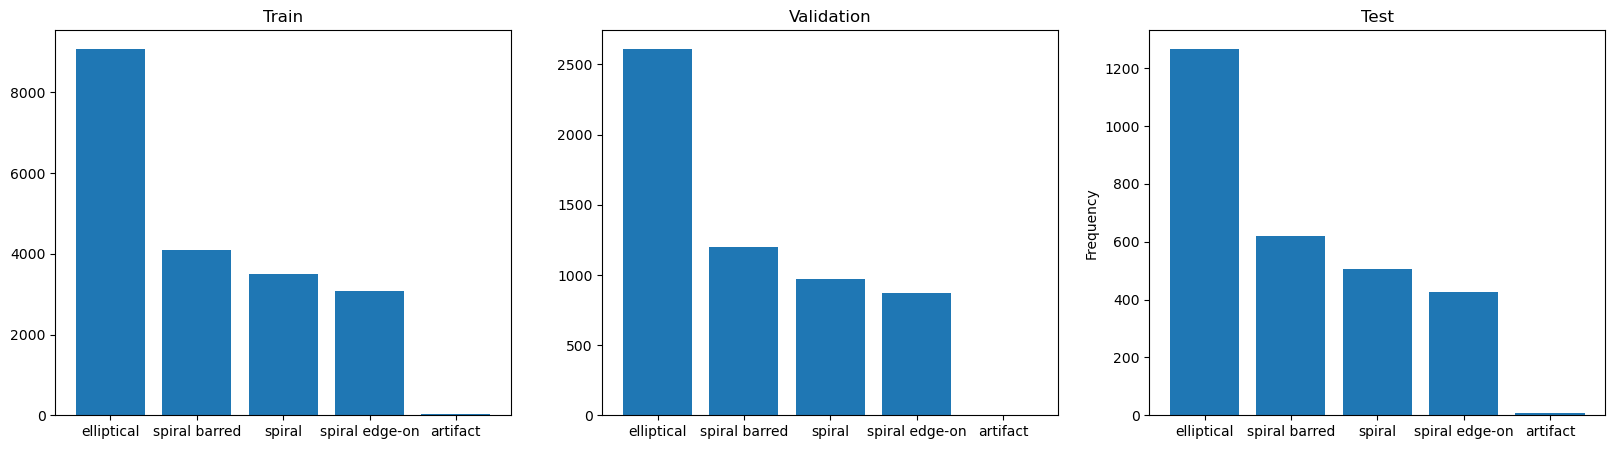

In [2]:
with open(os.path.join(DATASET_DIR, 'galaxy_train.json'), 'r') as file:
    train_data = json.load(file)

with open(os.path.join(DATASET_DIR, 'galaxy_val.json'), 'r') as file:
    val_data = json.load(file)

with open(os.path.join(DATASET_DIR, 'galaxy_test.json'), 'r') as file:
    test_data = json.load(file)


# Get class distributions for each split
train_distribution = get_class_distribution(train_data)
val_distribution = get_class_distribution(val_data)
test_distribution = get_class_distribution(test_data)

# Print the distributions
print("Training set class distribution:")
print(train_distribution)

print("Validation set class distribution:")
print(val_distribution)

print("Test set class distribution:")
print(test_distribution)

# Plot the distributions
plot_distribution([train_distribution, val_distribution, test_distribution], ['Train', "Validation", 'Test'])


In [63]:
import skimage
import os
import numpy as np
import matplotlib.pyplot as plt

from config import DATASET_DIR

classes = []
objects = []
for k,v in val_data.items():
    cls_name = v["regions"][0]["region_attributes"]["object_name"]
    if cls_name not in classes:
        classes.append(cls_name)
        rr, cc = skimage.draw.polygon(v["regions"][0]["shape_attributes"]["all_points_y"], v["regions"][0]["shape_attributes"]["all_points_x"])

        objects.append((v["filename"], (rr, cc)))

In [61]:
classes

['elliptical', 'spiral edge-on', 'spiral barred', 'spiral', 'artifact']

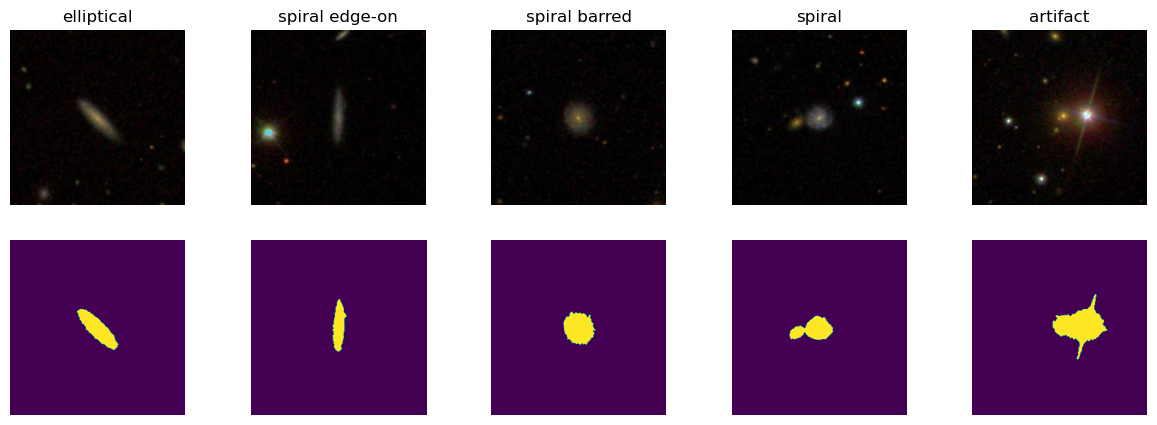

In [69]:
fig, axs = plt.subplots(2, len(classes), figsize=(15, 5))
i=0
for cls, obj in zip(classes, objects):
    image = skimage.io.imread(os.path.join(DATASET_DIR, "original/zoo2Main", obj[0]))
    mask = np.zeros([256, 256], dtype=np.uint8)
    mask[obj[1][0], obj[1][1]] = 1

    axs[0,i].imshow(image)
    axs[1,i].imshow(mask)

    axs[0,i].set_title(cls)

    axs[0,i].axis("off")
    axs[1,i].axis("off")
    i+=1